# Importing the basic packages



In [1]:
#numpy- mathematical operations
# pandas - data analysis and create dataframes
# matplotlib - gives graphical representations for the output 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# maximum number of rows that pandas will display while printing a dataframe (i.e) only 10 rows will be displayed
pd.set_option('display.max_rows', 10)

# Loading the dataset

In [3]:
#read the dataset into dataframes, training and testing set respectively
df_train = pd.read_csv('train_aWnotuB.csv', parse_dates=[0], infer_datetime_format=True)
df_test = pd.read_csv('test_BdBKkAj.csv', parse_dates=[0], infer_datetime_format=True)

In [4]:

print('\n')
print('Size of training set: ' + str(df_train.shape))
print(' Size of testing set: ' + str(df_test.shape))

print('\n')
print('Columns in train: ' + str(df_train.columns.tolist()))
print(' Columns in test: ' + str(df_test.columns.tolist()))





Size of training set: (48120, 4)
 Size of testing set: (11808, 3)


Columns in train: ['DateTime', 'Junction', 'Vehicles', 'ID']
 Columns in test: ['DateTime', 'Junction', 'ID']



# head() - gives the first 5 rows as output

In [5]:
df_train.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [6]:
df_test.head()

,DateTime,Junction,ID
0,2017-07-01 00:00:00,1,20170701001
1,2017-07-01 01:00:00,1,20170701011
2,2017-07-01 02:00:00,1,20170701021
3,2017-07-01 03:00:00,1,20170701031
4,2017-07-01 04:00:00,1,20170701041


# describe() - 
### Generate descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided.

In [7]:
df_train.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [8]:
df_test.describe()

,Junction,ID
count,11808.000000,1.180800e+04
mean,2.500000,2.017087e+10
std,1.118081,1.124665e+05
min,1.000000,2.017070e+10
25%,1.750000,2.017073e+10
50%,2.500000,2.017083e+10
75%,3.250000,2.017100e+10
max,4.000000,2.017103e+10


# Seaborn
## Seaborn is a data visualization library for Python that runs on top of the popular Matplotlib data visualization library, although it provides a simple interface and aesthetically better-looking plots.

# Time
## Python has a module named time to handle time-related tasks. 

In [9]:
import seaborn as sns
import time

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


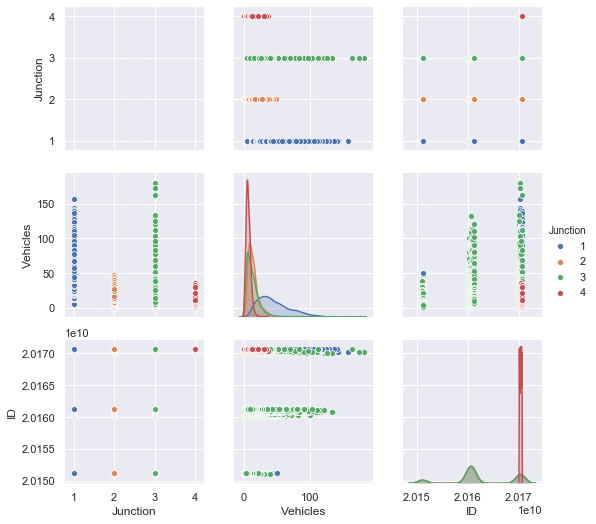

In [10]:
#Setting the size and grid for plotting
sns.set(rc= {"figure.figsize": (10, 8)})
sns.pairplot(df_train, hue="Junction")

# EDA - Exploratory Data Analysis

In [11]:
df_tmp = df_train.set_index(['Junction', 'DateTime'])

In [12]:
level_values = df_tmp.index.get_level_values

In [13]:
time_targets = df_tmp.groupby([level_values(0)] + [pd.Grouper(freq='1M', level=-1)])['Vehicles'].sum()
time_targets

Junction  DateTime  
1         2015-11-30    14736
          2015-12-31    15487
          2016-01-31    17940
          2016-02-29    20813
          2016-03-31    22215
                        ...  
4         2017-02-28     5564
          2017-03-31     4931
          2017-04-30     4454
          2017-05-31     4877
          2017-06-30     6097
Name: Vehicles, Length: 66, dtype: int64

In [14]:
del df_tmp
del time_targets

# convert each of the 4 junctions into 4 seperate columns
## prediction for each junction will be done

In [15]:
#creating seperate columns for each junction 
train = df_train.pivot(index='DateTime',columns='Junction', values='Vehicles')
train

Junction,1,2,3,4
DateTime,,,,
2015-11-01 00:00:00,15.0,6.0,9.0,NaN
2015-11-01 01:00:00,13.0,6.0,7.0,NaN
2015-11-01 02:00:00,10.0,5.0,5.0,NaN
2015-11-01 03:00:00,7.0,6.0,1.0,NaN
2015-11-01 04:00:00,9.0,7.0,2.0,NaN
...,...,...,...,...
2017-06-30 19:00:00,105.0,34.0,33.0,11.0
2017-06-30 20:00:00,96.0,35.0,31.0,30.0
2017-06-30 21:00:00,90.0,31.0,28.0,16.0


In [16]:
#Fill NaNs with 0 vehicles
train = train.fillna(0) 

# Generate lag features

In [17]:
#for this time series dataset, by generating lag features it is easy to handle the data and send it as an input 
#through dataframes. This way all of the data will not create a load during execution.
def gen_lag_features(df, n_in=1, n_out=1, dropnan=True):
    """
    Arguments:
        df: Dataframe of observations.
        n_in: Number of lag observations as input (X).
        n_out: Number of forecast observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Dataframe.
    """
    n_vars = df.shape[1]
    cols, names = list(), list()
    # input sequence (t-n,...,t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('Junction %d (H-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('Junction %d (H)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('Junction %d (H+%d)' % (j+1, i)) for j in range(n_vars)]
    # concatenate all columns together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [18]:
Xy_train = gen_lag_features(train)
Xy_train

,Junction 1 (H-1),Junction 2 (H-1),Junction 3 (H-1),Junction 4 (H-1),Junction 1 (H),Junction 2 (H),Junction 3 (H),Junction 4 (H)
DateTime,,,,,,,,
2015-11-01 01:00:00,15.0,6.0,9.0,0.0,13.0,6.0,7.0,0.0
2015-11-01 02:00:00,13.0,6.0,7.0,0.0,10.0,5.0,5.0,0.0
2015-11-01 03:00:00,10.0,5.0,5.0,0.0,7.0,6.0,1.0,0.0
2015-11-01 04:00:00,7.0,6.0,1.0,0.0,9.0,7.0,2.0,0.0
2015-11-01 05:00:00,9.0,7.0,2.0,0.0,6.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...
2017-06-30 19:00:00,95.0,34.0,38.0,17.0,105.0,34.0,33.0,11.0
2017-06-30 20:00:00,105.0,34.0,33.0,11.0,96.0,35.0,31.0,30.0
2017-06-30 21:00:00,96.0,35.0,31.0,30.0,90.0,31.0,28.0,16.0


# Normalize features
### Normalization is a rescaling of the data from the original range so that all values are within the new range of 0 and 1. Normalization requires that you know or are able to accurately estimate the minimum and maximum observable values.

In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# scaler = MinMaxScaler(feature_range=(0, 1)), MinMaxScaler subtracts the minimum value in the feature and 
#then divides by the range. The range is the difference between the original maximum and original minimum. 
#MinMaxScaler preserves the shape of the original distribution.

# scaler = StandardScaler(), Fit to data, then transform it. 
#Fits transformer to X and y with optional parameters fit_params and returns a transformed version of X.
scaler = MinMaxScaler(feature_range=(0, 1))
Xy_train[Xy_train.columns] = scaler.fit_transform(Xy_train[Xy_train.columns])

Xy_train

,Junction 1 (H-1),Junction 2 (H-1),Junction 3 (H-1),Junction 4 (H-1),Junction 1 (H),Junction 2 (H),Junction 3 (H),Junction 4 (H)
DateTime,,,,,,,,
2015-11-01 01:00:00,0.066225,0.106383,0.044693,0.000000,0.052980,0.106383,0.033520,0.000000
2015-11-01 02:00:00,0.052980,0.106383,0.033520,0.000000,0.033113,0.085106,0.022346,0.000000
2015-11-01 03:00:00,0.033113,0.085106,0.022346,0.000000,0.013245,0.106383,0.000000,0.000000
2015-11-01 04:00:00,0.013245,0.106383,0.000000,0.000000,0.026490,0.127660,0.005587,0.000000
2015-11-01 05:00:00,0.026490,0.127660,0.005587,0.000000,0.006623,0.021277,0.005587,0.000000
...,...,...,...,...,...,...,...,...
2017-06-30 19:00:00,0.596026,0.702128,0.206704,0.472222,0.662252,0.702128,0.178771,0.305556
2017-06-30 20:00:00,0.662252,0.702128,0.178771,0.305556,0.602649,0.723404,0.167598,0.833333
2017-06-30 21:00:00,0.602649,0.723404,0.167598,0.833333,0.562914,0.638298,0.150838,0.444444


# Split real and predicted values

In [20]:
X_train = Xy_train[Xy_train.index < '2017-04-01'].iloc[:,0:4]
X_train

,Junction 1 (H-1),Junction 2 (H-1),Junction 3 (H-1),Junction 4 (H-1)
DateTime,,,,
2015-11-01 01:00:00,0.066225,0.106383,0.044693,0.000000
2015-11-01 02:00:00,0.052980,0.106383,0.033520,0.000000
2015-11-01 03:00:00,0.033113,0.085106,0.022346,0.000000
2015-11-01 04:00:00,0.013245,0.106383,0.000000,0.000000
2015-11-01 05:00:00,0.026490,0.127660,0.005587,0.000000
...,...,...,...,...
2017-03-31 19:00:00,0.476821,0.574468,0.178771,0.166667
2017-03-31 20:00:00,0.496689,0.531915,0.156425,0.222222
2017-03-31 21:00:00,0.483444,0.638298,0.156425,0.222222


In [21]:
y_train = Xy_train[Xy_train.index < '2017-04-01'].iloc[:,4:]
y_train

,Junction 1 (H),Junction 2 (H),Junction 3 (H),Junction 4 (H)
DateTime,,,,
2015-11-01 01:00:00,0.052980,0.106383,0.033520,0.000000
2015-11-01 02:00:00,0.033113,0.085106,0.022346,0.000000
2015-11-01 03:00:00,0.013245,0.106383,0.000000,0.000000
2015-11-01 04:00:00,0.026490,0.127660,0.005587,0.000000
2015-11-01 05:00:00,0.006623,0.021277,0.005587,0.000000
...,...,...,...,...
2017-03-31 19:00:00,0.496689,0.531915,0.156425,0.222222
2017-03-31 20:00:00,0.483444,0.638298,0.156425,0.222222
2017-03-31 21:00:00,0.403974,0.574468,0.150838,0.250000


# Reshape the Data

In [22]:
print(X_train.shape, y_train.shape)

(12407, 4) (12407, 4)


In [23]:
X_train = np.expand_dims(X_train.values, axis=2)
print(X_train.shape)

y_train = y_train.values
print(y_train.shape)

(12407, 4, 1)
(12407, 4)


# Modeling



# Keras
### Keras is the high-level API of TensorFlow 2.0: an approchable, highly-productive interface for solving machine learning problems, with a focus on modern deep learning. It provides essential abstractions and building blocks for developing and shipping machine learning solutions with high iteration velocity.

In [24]:
'''Sequential model is a linear stack of layers.'''
from keras.models import Sequential
'''Dense layer is the regular deeply connected neural network layer'''
from keras.layers import Dense
'''LSTM network is a kind of recurrent neural network. 
LSTM networks are well-suited to classifying, processing and making predictions based on time series data,
     since there can be lags of unknown duration between important events in a time series. '''
from keras.layers import LSTM
'''It draws samples from a truncated normal distribution centered on 0 with
stddev = sqrt(2 / fan_in) where fan_in is the number of input units in the weight tensor.'''
from keras.initializers import he_normal
import keras.backend as K
 
    
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))


# Fitting the values to the model to predict using epoch

### Regression analysis consists of a set of machine learning methods that allow us to predict a continuous outcome variable (y) based on the value of one or multiple predictor variables (x). Briefly, the goal of regression model is to build a mathematical equation that defines y as a function of the x variables. Next, this equation can be used to predict the outcome (y) on the basis of new values of the predictor variables (x).

## epoch - is used to train the model by fitting it many number of times as mentioned to increase accuracy of the prediction
## here we took 20 epochs

In [25]:
# Initialising the RNN
regressor = Sequential()
 
# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 50,      # units which is the dimensionality of the output space
                   activation = 'relu', # default is tanh
                   kernel_initializer = he_normal(seed=0),
                   input_shape = (None, 1)))  # input_shape as the shape of our training set.
  
# Output for 4 junctions
regressor.add(Dense(units = 4))
 
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = root_mean_squared_error)
# Fitting the RNN 
regressor.fit(X_train, y_train, batch_size = 128, epochs = 20, verbose = 1)

Epoch 1/20
97/97 [==============================] - 0s 3ms/step - loss: 0.0684
Epoch 2/20
97/97 [==============================] - 0s 3ms/step - loss: 0.0389
Epoch 3/20
97/97 [==============================] - 0s 3ms/step - loss: 0.0368
Epoch 4/20
97/97 [==============================] - 0s 3ms/step - loss: 0.0354
Epoch 5/20
97/97 [==============================] - 0s 3ms/step - loss: 0.0344
Epoch 6/20
97/97 [==============================] - 0s 3ms/step - loss: 0.0336
Epoch 7/20
97/97 [==============================] - 0s 3ms/step - loss: 0.0331
Epoch 8/20
97/97 [==============================] - 0s 3ms/step - loss: 0.0328
Epoch 9/20
97/97 [==============================] - 0s 3ms/step - loss: 0.0326
Epoch 10/20
97/97 [==============================] - 0s 3ms/step - loss: 0.0327
Epoch 11/20
97/97 [==============================] - 0s 3ms/step - loss: 0.0324
Epoch 12/20
97/97 [==============================] - 0s 3ms/step - loss: 0.0324
Epoch 13/20
97/97 [==============================

# Validating

In [26]:
X_valid = Xy_train[Xy_train.index >= '2017-04-01'].iloc[:,0:4]
X_valid

,Junction 1 (H-1),Junction 2 (H-1),Junction 3 (H-1),Junction 4 (H-1)
DateTime,,,,
2017-04-01 00:00:00,0.417219,0.553191,0.162011,0.166667
2017-04-01 01:00:00,0.384106,0.510638,0.122905,0.166667
2017-04-01 02:00:00,0.317881,0.574468,0.078212,0.138889
2017-04-01 03:00:00,0.238411,0.361702,0.083799,0.111111
2017-04-01 04:00:00,0.225166,0.361702,0.055866,0.111111
...,...,...,...,...
2017-06-30 19:00:00,0.596026,0.702128,0.206704,0.472222
2017-06-30 20:00:00,0.662252,0.702128,0.178771,0.305556
2017-06-30 21:00:00,0.602649,0.723404,0.167598,0.833333


In [27]:
'''The expand_dims() function is used to expand the shape of an array.
Insert a new axis that will appear at the axis position in the expanded array shape.'''
X_valid = np.expand_dims(X_valid.values, axis=2)
y_pred = regressor.predict(X_valid)
# reconcatenate with the X data as scaler expects a shape of 8
#rescale y in the integer count range (i.e) Scale back the data to the original representation

y_pred = scaler.inverse_transform(np.concatenate((X_valid.squeeze(), y_pred), axis = 1))[:, 4:]
y_pred

array([[67.76109496, 24.08878261, 26.71938795,  7.88895714],
       [63.34756318, 22.28038865, 20.41864533,  7.36036938],
       [54.06827947, 22.80769262, 13.91220393,  5.82281774],
       ...,
       [95.60246068, 29.26506126, 32.71899018, 21.48305869],
       [89.74540657, 27.36173564, 27.46969098, 12.77955222],
       [85.74802172, 25.35737967, 26.55912009, 16.14759564]])

In [28]:
y_truth = train[train.index >= '2017-04-01']
y_truth

Junction,1,2,3,4
DateTime,,,,
2017-04-01 00:00:00,63.0,25.0,23.0,6.0
2017-04-01 01:00:00,53.0,28.0,15.0,5.0
2017-04-01 02:00:00,41.0,18.0,16.0,4.0
2017-04-01 03:00:00,39.0,18.0,11.0,4.0
2017-04-01 04:00:00,31.0,15.0,10.0,1.0
...,...,...,...,...
2017-06-30 19:00:00,105.0,34.0,33.0,11.0
2017-06-30 20:00:00,96.0,35.0,31.0,30.0
2017-06-30 21:00:00,90.0,31.0,28.0,16.0


# Prediction

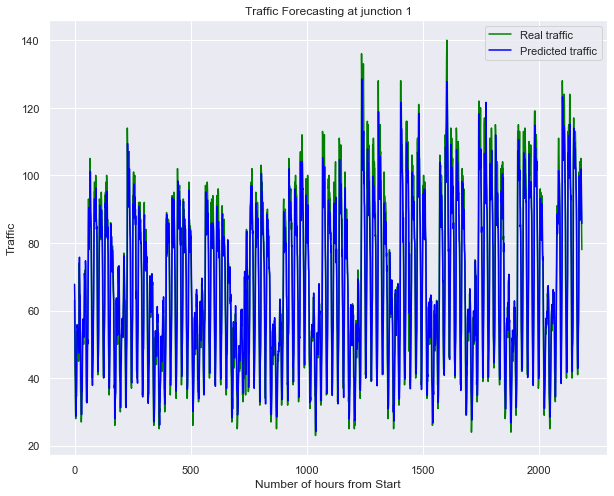

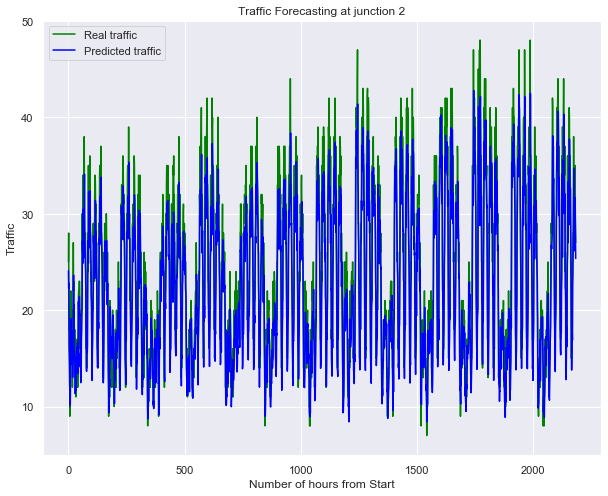

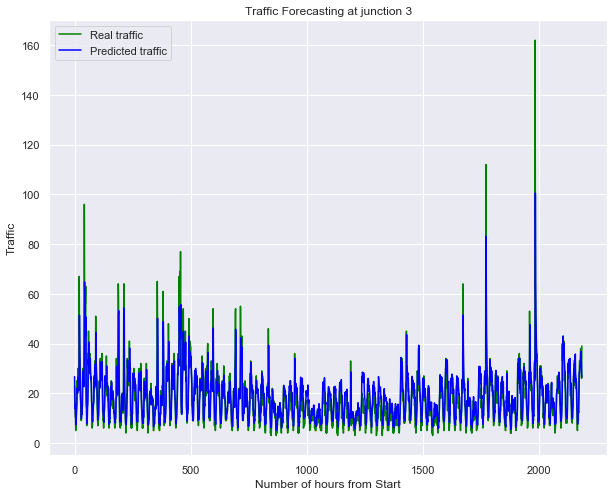

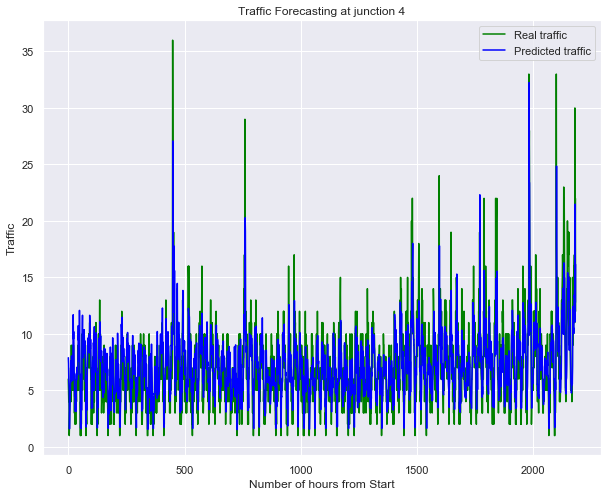

In [29]:
# Visualising Result for the junctions
for junction in range(4):
    plt.figure
    plt.plot(y_truth.values[:,junction], color = 'green', label = 'Real traffic')
    plt.plot(y_pred[:,junction], color = 'blue', label = 'Predicted traffic')
    plt.title('Traffic Forecasting at junction %i' % (junction+1))
    plt.xlabel('Number of hours from Start')
    plt.ylabel('Traffic')
    plt.legend()
    plt.show()

### RMSE or root-mean-square error is a frequently used measure of the differences between values predicted by a model or an estimator and the values observed.

In [30]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))
rmse(y_truth, y_pred)

5.833931121909256